In [1]:
# to access functions from other locations
import sys
sys.path.append('/data/ad181/RemoteDir/rl_robust_owc')

In [2]:
%matplotlib notebook
import numpy as np
import time
import pickle
import os
import matplotlib.pyplot as plt

import gym
from stable_baselines3.ppo import PPO, MlpPolicy
from stable_baselines3.common.vec_env import SubprocVecEnv, DummyVecEnv
from stable_baselines3.common.callbacks import CallbackList
from utils.custom_eval_callback import CustomEvalCallback
from typing import Callable

from utils.plot_functions import plot_learning
from utils.env_wrappers import StepReset, StateCoarse

/home/ad181/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ad181/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ad181/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ad181/anaconda3/lib/python3.7/site-packages/tensorboard/co

In [3]:
seed=1
case='case_2_ppo_full_state'

In [4]:
os.makedirs('./data', exist_ok=True)
os.makedirs('./data/'+case, exist_ok=True)

In [5]:
with open('../envs_params/env_data/env_train.pkl', 'rb') as input:
    env_train = pickle.load(input)

with open('../envs_params/env_data/env_eval.pkl', 'rb') as input:
    env_eval = pickle.load(input)

In [6]:
# env wrapper 
x_coords, y_coords = env_train.p_x, env_train.p_y

def env_wrappers(env, x_coords, y_coords):
    env = StepReset(env)
    return env

In [7]:
# env_train = env_wrappers(env_train, x_coords, y_coords)
# print(env_train.observation_space)
# base_action = np.ones(env_train.action_space.shape[0])

# state, done = env_train.reset(), False
# print(state)
# while not done:
#     state, reward, done, info = env_train.step(base_action)
#     print(state)

In [8]:
def make_env(env, rank: int, seed: int) -> Callable:
    """
    Utility function for multiprocessed env.
    
    :param env_id: (str) the environment ID
    :param num_env: (int) the number of environment you wish to have in subprocesses
    :param seed: (int) the inital seed for RNG
    :param rank: (int) index of the subprocess
    :return: (Callable)
    """
    def _init() -> gym.Env:
        env_ = env
        env_.seed(seed + rank)
        return env_
    return _init

seed 1
Box(-100000.0, 100000.0, (3721,), float64)
seed 1: model definition ..
Using cuda device
seed 1: learning ..


/data/ad181/RemoteDir/Paper_1_codes_revised/utils/custom_eval_callback.py:97: UserWarning: Training and eval env are not of the same type<stable_baselines3.common.vec_env.subproc_vec_env.SubprocVecEnv object at 0x7fb4641e6358> != <stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7fb4641e62e8>
  warnings.warn("Training and eval env are not of the same type" f"{self.training_env} != {self.eval_env}")
/data/ad181/RemoteDir/Paper_1_codes_revised/utils/custom_eval_callback.py:97: UserWarning: Training and eval env are not of the same type<stable_baselines3.common.vec_env.subproc_vec_env.SubprocVecEnv object at 0x7fb4641e6358> != <stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7fb4641e6320>
  warnings.warn("Training and eval env are not of the same type" f"{self.training_env} != {self.eval_env}")


-----------------------------
| time/              |      |
|    fps             | 214  |
|    iterations      | 1    |
|    time_elapsed    | 5    |
|    total_timesteps | 1280 |
-----------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 196          |
|    iterations           | 2            |
|    time_elapsed         | 13           |
|    total_timesteps      | 2560         |
| train/                  |              |
|    approx_kl            | 0.0031201574 |
|    clip_fraction        | 0.12         |
|    clip_range           | 0.1          |
|    entropy_loss         | 2.41         |
|    explained_variance   | -0.219       |
|    learning_rate        | 1e-05        |
|    loss                 | -0.0182      |
|    n_updates            | 20           |
|    policy_gradient_loss | -0.0123      |
|    std                  | 0.15         |
|    value_loss           | 0.0275       |
----------------

------------------------------------------
| time/                   |              |
|    fps                  | 146          |
|    iterations           | 11           |
|    time_elapsed         | 96           |
|    total_timesteps      | 14080        |
| train/                  |              |
|    approx_kl            | 0.0060340515 |
|    clip_fraction        | 0.269        |
|    clip_range           | 0.1          |
|    entropy_loss         | 2.41         |
|    explained_variance   | 0.96         |
|    learning_rate        | 1e-05        |
|    loss                 | -0.0345      |
|    n_updates            | 200          |
|    policy_gradient_loss | -0.0262      |
|    std                  | 0.149        |
|    value_loss           | 0.00114      |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 149         |
|    iterations           | 12          |
|    time_elaps

-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 21          |
|    time_elapsed         | 185         |
|    total_timesteps      | 26880       |
| train/                  |             |
|    approx_kl            | 0.011489942 |
|    clip_fraction        | 0.321       |
|    clip_range           | 0.1         |
|    entropy_loss         | 2.43        |
|    explained_variance   | 0.965       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.0348     |
|    n_updates            | 400         |
|    policy_gradient_loss | -0.0291     |
|    std                  | 0.149       |
|    value_loss           | 0.00187     |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 146          |
|    iterations           | 22           |
|    time_elapsed         | 19

-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 31          |
|    time_elapsed         | 273         |
|    total_timesteps      | 39680       |
| train/                  |             |
|    approx_kl            | 0.008804161 |
|    clip_fraction        | 0.319       |
|    clip_range           | 0.1         |
|    entropy_loss         | 2.44        |
|    explained_variance   | 0.969       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.0335     |
|    n_updates            | 600         |
|    policy_gradient_loss | -0.0289     |
|    std                  | 0.149       |
|    value_loss           | 0.000901    |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 146         |
|    iterations           | 32          |
|    time_elapsed         | 279   

-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 41          |
|    time_elapsed         | 360         |
|    total_timesteps      | 52480       |
| train/                  |             |
|    approx_kl            | 0.010447727 |
|    clip_fraction        | 0.32        |
|    clip_range           | 0.1         |
|    entropy_loss         | 2.45        |
|    explained_variance   | 0.969       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.0415     |
|    n_updates            | 800         |
|    policy_gradient_loss | -0.0303     |
|    std                  | 0.148       |
|    value_loss           | 0.000959    |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 146          |
|    iterations           | 42           |
|    time_elapsed         | 36

-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 51          |
|    time_elapsed         | 448         |
|    total_timesteps      | 65280       |
| train/                  |             |
|    approx_kl            | 0.007038333 |
|    clip_fraction        | 0.345       |
|    clip_range           | 0.1         |
|    entropy_loss         | 2.46        |
|    explained_variance   | 0.969       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.0421     |
|    n_updates            | 1000        |
|    policy_gradient_loss | -0.0325     |
|    std                  | 0.148       |
|    value_loss           | 0.000977    |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 146         |
|    iterations           | 52          |
|    time_elapsed         | 455   

-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 61          |
|    time_elapsed         | 537         |
|    total_timesteps      | 78080       |
| train/                  |             |
|    approx_kl            | 0.009457727 |
|    clip_fraction        | 0.348       |
|    clip_range           | 0.1         |
|    entropy_loss         | 2.47        |
|    explained_variance   | 0.967       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.0488     |
|    n_updates            | 1200        |
|    policy_gradient_loss | -0.0349     |
|    std                  | 0.148       |
|    value_loss           | 0.00107     |
-----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 145        |
|    iterations           | 62         |
|    time_elapsed         | 543       

------------------------------------------
| time/                   |              |
|    fps                  | 145          |
|    iterations           | 71           |
|    time_elapsed         | 625          |
|    total_timesteps      | 90880        |
| train/                  |              |
|    approx_kl            | 0.0077046575 |
|    clip_fraction        | 0.364        |
|    clip_range           | 0.1          |
|    entropy_loss         | 2.48         |
|    explained_variance   | 0.965        |
|    learning_rate        | 1e-05        |
|    loss                 | -0.0447      |
|    n_updates            | 1400         |
|    policy_gradient_loss | -0.0348      |
|    std                  | 0.147        |
|    value_loss           | 0.00103      |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 72          |
|    time_elaps

------------------------------------------
| time/                   |              |
|    fps                  | 145          |
|    iterations           | 81           |
|    time_elapsed         | 713          |
|    total_timesteps      | 103680       |
| train/                  |              |
|    approx_kl            | 0.0029927443 |
|    clip_fraction        | 0.367        |
|    clip_range           | 0.1          |
|    entropy_loss         | 2.49         |
|    explained_variance   | 0.968        |
|    learning_rate        | 1e-05        |
|    loss                 | -0.0424      |
|    n_updates            | 1600         |
|    policy_gradient_loss | -0.0322      |
|    std                  | 0.147        |
|    value_loss           | 0.000989     |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 82          |
|    time_elaps

-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 91          |
|    time_elapsed         | 801         |
|    total_timesteps      | 116480      |
| train/                  |             |
|    approx_kl            | 0.013012616 |
|    clip_fraction        | 0.394       |
|    clip_range           | 0.1         |
|    entropy_loss         | 2.5         |
|    explained_variance   | 0.97        |
|    learning_rate        | 1e-05       |
|    loss                 | -0.0426     |
|    n_updates            | 1800        |
|    policy_gradient_loss | -0.0348     |
|    std                  | 0.147       |
|    value_loss           | 0.000974    |
-----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 145        |
|    iterations           | 92         |
|    time_elapsed         | 808       

-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 101         |
|    time_elapsed         | 889         |
|    total_timesteps      | 129280      |
| train/                  |             |
|    approx_kl            | 0.010385003 |
|    clip_fraction        | 0.394       |
|    clip_range           | 0.1         |
|    entropy_loss         | 2.51        |
|    explained_variance   | 0.973       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.0457     |
|    n_updates            | 2000        |
|    policy_gradient_loss | -0.0368     |
|    std                  | 0.146       |
|    value_loss           | 0.000942    |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 102         |
|    time_elapsed         | 895   

-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 111         |
|    time_elapsed         | 976         |
|    total_timesteps      | 142080      |
| train/                  |             |
|    approx_kl            | 0.011692461 |
|    clip_fraction        | 0.399       |
|    clip_range           | 0.1         |
|    entropy_loss         | 2.52        |
|    explained_variance   | 0.97        |
|    learning_rate        | 1e-05       |
|    loss                 | -0.0478     |
|    n_updates            | 2200        |
|    policy_gradient_loss | -0.0362     |
|    std                  | 0.146       |
|    value_loss           | 0.00103     |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 112         |
|    time_elapsed         | 982   

-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 121         |
|    time_elapsed         | 1064        |
|    total_timesteps      | 154880      |
| train/                  |             |
|    approx_kl            | 0.009959151 |
|    clip_fraction        | 0.387       |
|    clip_range           | 0.1         |
|    entropy_loss         | 2.53        |
|    explained_variance   | 0.97        |
|    learning_rate        | 1e-05       |
|    loss                 | -0.0487     |
|    n_updates            | 2400        |
|    policy_gradient_loss | -0.0343     |
|    std                  | 0.146       |
|    value_loss           | 0.00101     |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 145          |
|    iterations           | 122          |
|    time_elapsed         | 10

------------------------------------------
| time/                   |              |
|    fps                  | 145          |
|    iterations           | 131          |
|    time_elapsed         | 1151         |
|    total_timesteps      | 167680       |
| train/                  |              |
|    approx_kl            | 0.0065026227 |
|    clip_fraction        | 0.433        |
|    clip_range           | 0.1          |
|    entropy_loss         | 2.54         |
|    explained_variance   | 0.971        |
|    learning_rate        | 1e-05        |
|    loss                 | -0.047       |
|    n_updates            | 2600         |
|    policy_gradient_loss | -0.0364      |
|    std                  | 0.145        |
|    value_loss           | 0.00107      |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 132         |
|    time_elaps

------------------------------------------
| time/                   |              |
|    fps                  | 145          |
|    iterations           | 141          |
|    time_elapsed         | 1239         |
|    total_timesteps      | 180480       |
| train/                  |              |
|    approx_kl            | 0.0124863535 |
|    clip_fraction        | 0.398        |
|    clip_range           | 0.1          |
|    entropy_loss         | 2.55         |
|    explained_variance   | 0.968        |
|    learning_rate        | 1e-05        |
|    loss                 | -0.0465      |
|    n_updates            | 2800         |
|    policy_gradient_loss | -0.0343      |
|    std                  | 0.145        |
|    value_loss           | 0.000992     |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 145          |
|    iterations           | 142          |
|    time_e

----------------------------------------
| time/                   |            |
|    fps                  | 145        |
|    iterations           | 151        |
|    time_elapsed         | 1327       |
|    total_timesteps      | 193280     |
| train/                  |            |
|    approx_kl            | 0.02151396 |
|    clip_fraction        | 0.422      |
|    clip_range           | 0.1        |
|    entropy_loss         | 2.56       |
|    explained_variance   | 0.964      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0458    |
|    n_updates            | 3000       |
|    policy_gradient_loss | -0.0348    |
|    std                  | 0.145      |
|    value_loss           | 0.00111    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 145        |
|    iterations           | 152        |
|    time_elapsed         | 1334       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 145          |
|    iterations           | 161          |
|    time_elapsed         | 1416         |
|    total_timesteps      | 206080       |
| train/                  |              |
|    approx_kl            | 0.0133221615 |
|    clip_fraction        | 0.381        |
|    clip_range           | 0.1          |
|    entropy_loss         | 2.57         |
|    explained_variance   | 0.969        |
|    learning_rate        | 1e-05        |
|    loss                 | -0.0434      |
|    n_updates            | 3200         |
|    policy_gradient_loss | -0.0346      |
|    std                  | 0.145        |
|    value_loss           | 0.00101      |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 162         |
|    time_elaps

-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 171         |
|    time_elapsed         | 1504        |
|    total_timesteps      | 218880      |
| train/                  |             |
|    approx_kl            | 0.011113757 |
|    clip_fraction        | 0.443       |
|    clip_range           | 0.1         |
|    entropy_loss         | 2.58        |
|    explained_variance   | 0.964       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.0511     |
|    n_updates            | 3400        |
|    policy_gradient_loss | -0.0362     |
|    std                  | 0.144       |
|    value_loss           | 0.00119     |
-----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 145        |
|    iterations           | 172        |
|    time_elapsed         | 1511      

-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 181         |
|    time_elapsed         | 1592        |
|    total_timesteps      | 231680      |
| train/                  |             |
|    approx_kl            | 0.012203771 |
|    clip_fraction        | 0.408       |
|    clip_range           | 0.1         |
|    entropy_loss         | 2.59        |
|    explained_variance   | 0.966       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.0511     |
|    n_updates            | 3600        |
|    policy_gradient_loss | -0.0373     |
|    std                  | 0.144       |
|    value_loss           | 0.00122     |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 145          |
|    iterations           | 182          |
|    time_elapsed         | 15

-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 191         |
|    time_elapsed         | 1681        |
|    total_timesteps      | 244480      |
| train/                  |             |
|    approx_kl            | 0.009682152 |
|    clip_fraction        | 0.444       |
|    clip_range           | 0.1         |
|    entropy_loss         | 2.61        |
|    explained_variance   | 0.97        |
|    learning_rate        | 1e-05       |
|    loss                 | -0.0423     |
|    n_updates            | 3800        |
|    policy_gradient_loss | -0.0372     |
|    std                  | 0.144       |
|    value_loss           | 0.001       |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 192         |
|    time_elapsed         | 1688  

-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 201         |
|    time_elapsed         | 1770        |
|    total_timesteps      | 257280      |
| train/                  |             |
|    approx_kl            | 0.025832867 |
|    clip_fraction        | 0.423       |
|    clip_range           | 0.1         |
|    entropy_loss         | 2.62        |
|    explained_variance   | 0.968       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.0496     |
|    n_updates            | 4000        |
|    policy_gradient_loss | -0.0348     |
|    std                  | 0.143       |
|    value_loss           | 0.0011      |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 202         |
|    time_elapsed         | 1777  

-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 211         |
|    time_elapsed         | 1858        |
|    total_timesteps      | 270080      |
| train/                  |             |
|    approx_kl            | 0.020267813 |
|    clip_fraction        | 0.435       |
|    clip_range           | 0.1         |
|    entropy_loss         | 2.62        |
|    explained_variance   | 0.97        |
|    learning_rate        | 1e-05       |
|    loss                 | -0.0515     |
|    n_updates            | 4200        |
|    policy_gradient_loss | -0.0377     |
|    std                  | 0.143       |
|    value_loss           | 0.000925    |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 212         |
|    time_elapsed         | 1865  

-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 221         |
|    time_elapsed         | 1946        |
|    total_timesteps      | 282880      |
| train/                  |             |
|    approx_kl            | 0.017778555 |
|    clip_fraction        | 0.452       |
|    clip_range           | 0.1         |
|    entropy_loss         | 2.64        |
|    explained_variance   | 0.973       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.0492     |
|    n_updates            | 4400        |
|    policy_gradient_loss | -0.0345     |
|    std                  | 0.143       |
|    value_loss           | 0.00101     |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 222         |
|    time_elapsed         | 1953  

-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 231         |
|    time_elapsed         | 2035        |
|    total_timesteps      | 295680      |
| train/                  |             |
|    approx_kl            | 0.010571023 |
|    clip_fraction        | 0.44        |
|    clip_range           | 0.1         |
|    entropy_loss         | 2.64        |
|    explained_variance   | 0.971       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.0494     |
|    n_updates            | 4600        |
|    policy_gradient_loss | -0.0369     |
|    std                  | 0.143       |
|    value_loss           | 0.000949    |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 232         |
|    time_elapsed         | 2042  

<IPython.core.display.Javascript object>


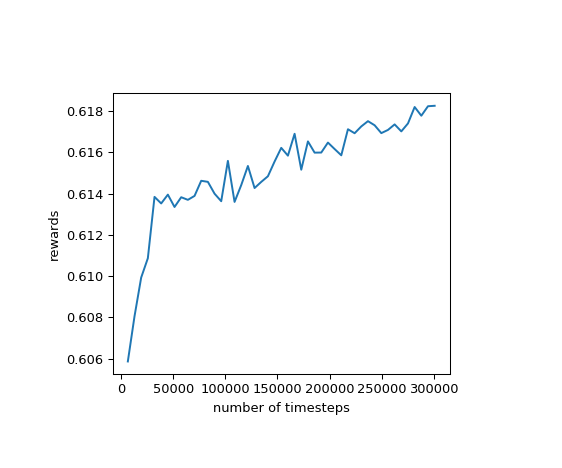

<IPython.core.display.Javascript object>


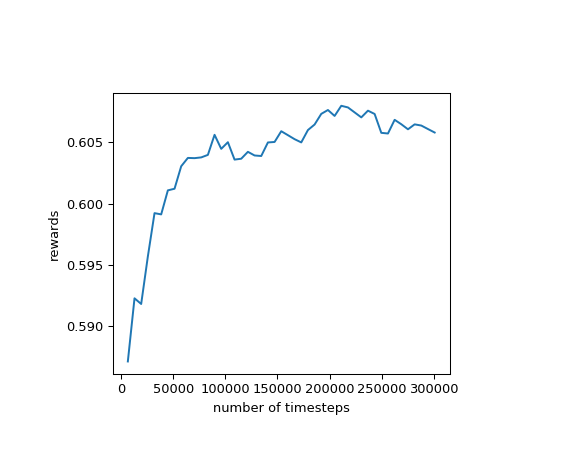

seed 2
Box(-100000.0, 100000.0, (3721,), float64)
seed 2: model definition ..
Using cuda device
seed 2: learning ..


/data/ad181/RemoteDir/Paper_1_codes_revised/utils/custom_eval_callback.py:97: UserWarning: Training and eval env are not of the same type<stable_baselines3.common.vec_env.subproc_vec_env.SubprocVecEnv object at 0x7fb460f21978> != <stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7fb460f21828>
  warnings.warn("Training and eval env are not of the same type" f"{self.training_env} != {self.eval_env}")
/data/ad181/RemoteDir/Paper_1_codes_revised/utils/custom_eval_callback.py:97: UserWarning: Training and eval env are not of the same type<stable_baselines3.common.vec_env.subproc_vec_env.SubprocVecEnv object at 0x7fb460f21978> != <stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7fb460f21e80>
  warnings.warn("Training and eval env are not of the same type" f"{self.training_env} != {self.eval_env}")


----------------------------------------
| time/                   |            |
|    fps                  | 219        |
|    iterations           | 1          |
|    time_elapsed         | 5          |
|    total_timesteps      | 1280       |
| train/                  |            |
|    approx_kl            | 0.01792178 |
|    clip_fraction        | 0.469      |
|    clip_range           | 0.1        |
|    entropy_loss         | 2.65       |
|    explained_variance   | 0.972      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0524    |
|    n_updates            | 4700       |
|    policy_gradient_loss | -0.0383    |
|    std                  | 0.142      |
|    value_loss           | 0.00106    |
----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 191          |
|    iterations           | 2            |
|    time_elapsed         | 13           |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 144          |
|    iterations           | 11           |
|    time_elapsed         | 97           |
|    total_timesteps      | 14080        |
| train/                  |              |
|    approx_kl            | 0.0070839077 |
|    clip_fraction        | 0.293        |
|    clip_range           | 0.1          |
|    entropy_loss         | 2.41         |
|    explained_variance   | 0.958        |
|    learning_rate        | 1e-05        |
|    loss                 | -0.0378      |
|    n_updates            | 200          |
|    policy_gradient_loss | -0.0281      |
|    std                  | 0.149        |
|    value_loss           | 0.00117      |
------------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 147       |
|    iterations           | 12        |
|    time_elapsed      

-----------------------------------------
| time/                   |             |
|    fps                  | 144         |
|    iterations           | 21          |
|    time_elapsed         | 185         |
|    total_timesteps      | 26880       |
| train/                  |             |
|    approx_kl            | 0.010643698 |
|    clip_fraction        | 0.328       |
|    clip_range           | 0.1         |
|    entropy_loss         | 2.43        |
|    explained_variance   | 0.97        |
|    learning_rate        | 1e-05       |
|    loss                 | -0.0379     |
|    n_updates            | 400         |
|    policy_gradient_loss | -0.0295     |
|    std                  | 0.149       |
|    value_loss           | 0.00119     |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 146          |
|    iterations           | 22           |
|    time_elapsed         | 19

------------------------------------------
| time/                   |              |
|    fps                  | 145          |
|    iterations           | 31           |
|    time_elapsed         | 273          |
|    total_timesteps      | 39680        |
| train/                  |              |
|    approx_kl            | 0.0051315976 |
|    clip_fraction        | 0.317        |
|    clip_range           | 0.1          |
|    entropy_loss         | 2.44         |
|    explained_variance   | 0.967        |
|    learning_rate        | 1e-05        |
|    loss                 | -0.0445      |
|    n_updates            | 600          |
|    policy_gradient_loss | -0.0292      |
|    std                  | 0.149        |
|    value_loss           | 0.000952     |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 146         |
|    iterations           | 32          |
|    time_elaps

------------------------------------------
| time/                   |              |
|    fps                  | 145          |
|    iterations           | 41           |
|    time_elapsed         | 361          |
|    total_timesteps      | 52480        |
| train/                  |              |
|    approx_kl            | 0.0037908694 |
|    clip_fraction        | 0.36         |
|    clip_range           | 0.1          |
|    entropy_loss         | 2.45         |
|    explained_variance   | 0.966        |
|    learning_rate        | 1e-05        |
|    loss                 | -0.0424      |
|    n_updates            | 800          |
|    policy_gradient_loss | -0.0339      |
|    std                  | 0.148        |
|    value_loss           | 0.000986     |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 146         |
|    iterations           | 42          |
|    time_elaps

------------------------------------------
| time/                   |              |
|    fps                  | 145          |
|    iterations           | 51           |
|    time_elapsed         | 449          |
|    total_timesteps      | 65280        |
| train/                  |              |
|    approx_kl            | 0.0101700565 |
|    clip_fraction        | 0.316        |
|    clip_range           | 0.1          |
|    entropy_loss         | 2.46         |
|    explained_variance   | 0.971        |
|    learning_rate        | 1e-05        |
|    loss                 | -0.0451      |
|    n_updates            | 1000         |
|    policy_gradient_loss | -0.0325      |
|    std                  | 0.148        |
|    value_loss           | 0.000933     |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 146          |
|    iterations           | 52           |
|    time_e

-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 61          |
|    time_elapsed         | 536         |
|    total_timesteps      | 78080       |
| train/                  |             |
|    approx_kl            | 0.012202828 |
|    clip_fraction        | 0.39        |
|    clip_range           | 0.1         |
|    entropy_loss         | 2.48        |
|    explained_variance   | 0.969       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.0466     |
|    n_updates            | 1200        |
|    policy_gradient_loss | -0.0349     |
|    std                  | 0.147       |
|    value_loss           | 0.00107     |
-----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 146        |
|    iterations           | 62         |
|    time_elapsed         | 543       

------------------------------------------
| time/                   |              |
|    fps                  | 145          |
|    iterations           | 71           |
|    time_elapsed         | 623          |
|    total_timesteps      | 90880        |
| train/                  |              |
|    approx_kl            | 0.0049039773 |
|    clip_fraction        | 0.361        |
|    clip_range           | 0.1          |
|    entropy_loss         | 2.49         |
|    explained_variance   | 0.967        |
|    learning_rate        | 1e-05        |
|    loss                 | -0.0433      |
|    n_updates            | 1400         |
|    policy_gradient_loss | -0.033       |
|    std                  | 0.147        |
|    value_loss           | 0.00107      |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 146         |
|    iterations           | 72          |
|    time_elaps

-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 81          |
|    time_elapsed         | 711         |
|    total_timesteps      | 103680      |
| train/                  |             |
|    approx_kl            | 0.004877662 |
|    clip_fraction        | 0.383       |
|    clip_range           | 0.1         |
|    entropy_loss         | 2.5         |
|    explained_variance   | 0.967       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.0442     |
|    n_updates            | 1600        |
|    policy_gradient_loss | -0.0325     |
|    std                  | 0.147       |
|    value_loss           | 0.00113     |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 146         |
|    iterations           | 82          |
|    time_elapsed         | 718   

------------------------------------------
| time/                   |              |
|    fps                  | 145          |
|    iterations           | 91           |
|    time_elapsed         | 799          |
|    total_timesteps      | 116480       |
| train/                  |              |
|    approx_kl            | 0.0113723725 |
|    clip_fraction        | 0.397        |
|    clip_range           | 0.1          |
|    entropy_loss         | 2.51         |
|    explained_variance   | 0.965        |
|    learning_rate        | 1e-05        |
|    loss                 | -0.0443      |
|    n_updates            | 1800         |
|    policy_gradient_loss | -0.0338      |
|    std                  | 0.146        |
|    value_loss           | 0.00105      |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 146         |
|    iterations           | 92          |
|    time_elaps

-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 101         |
|    time_elapsed         | 887         |
|    total_timesteps      | 129280      |
| train/                  |             |
|    approx_kl            | 0.010990731 |
|    clip_fraction        | 0.399       |
|    clip_range           | 0.1         |
|    entropy_loss         | 2.52        |
|    explained_variance   | 0.969       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.044      |
|    n_updates            | 2000        |
|    policy_gradient_loss | -0.0349     |
|    std                  | 0.146       |
|    value_loss           | 0.000999    |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 145          |
|    iterations           | 102          |
|    time_elapsed         | 89

------------------------------------------
| time/                   |              |
|    fps                  | 145          |
|    iterations           | 111          |
|    time_elapsed         | 975          |
|    total_timesteps      | 142080       |
| train/                  |              |
|    approx_kl            | 0.0072456435 |
|    clip_fraction        | 0.413        |
|    clip_range           | 0.1          |
|    entropy_loss         | 2.53         |
|    explained_variance   | 0.966        |
|    learning_rate        | 1e-05        |
|    loss                 | -0.0483      |
|    n_updates            | 2200         |
|    policy_gradient_loss | -0.0335      |
|    std                  | 0.146        |
|    value_loss           | 0.00105      |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 146         |
|    iterations           | 112         |
|    time_elaps

-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 121         |
|    time_elapsed         | 1063        |
|    total_timesteps      | 154880      |
| train/                  |             |
|    approx_kl            | 0.013561433 |
|    clip_fraction        | 0.42        |
|    clip_range           | 0.1         |
|    entropy_loss         | 2.55        |
|    explained_variance   | 0.969       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.0479     |
|    n_updates            | 2400        |
|    policy_gradient_loss | -0.0351     |
|    std                  | 0.145       |
|    value_loss           | 0.00102     |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 122         |
|    time_elapsed         | 1070  

-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 131         |
|    time_elapsed         | 1151        |
|    total_timesteps      | 167680      |
| train/                  |             |
|    approx_kl            | 0.012922011 |
|    clip_fraction        | 0.436       |
|    clip_range           | 0.1         |
|    entropy_loss         | 2.56        |
|    explained_variance   | 0.972       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.0448     |
|    n_updates            | 2600        |
|    policy_gradient_loss | -0.0369     |
|    std                  | 0.145       |
|    value_loss           | 0.00104     |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 132         |
|    time_elapsed         | 1158  

-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 141         |
|    time_elapsed         | 1239        |
|    total_timesteps      | 180480      |
| train/                  |             |
|    approx_kl            | 0.009705812 |
|    clip_fraction        | 0.438       |
|    clip_range           | 0.1         |
|    entropy_loss         | 2.57        |
|    explained_variance   | 0.973       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.049      |
|    n_updates            | 2800        |
|    policy_gradient_loss | -0.0392     |
|    std                  | 0.145       |
|    value_loss           | 0.000907    |
-----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 145        |
|    iterations           | 142        |
|    time_elapsed         | 1246      

-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 151         |
|    time_elapsed         | 1328        |
|    total_timesteps      | 193280      |
| train/                  |             |
|    approx_kl            | 0.009980618 |
|    clip_fraction        | 0.388       |
|    clip_range           | 0.1         |
|    entropy_loss         | 2.58        |
|    explained_variance   | 0.971       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.0442     |
|    n_updates            | 3000        |
|    policy_gradient_loss | -0.0335     |
|    std                  | 0.144       |
|    value_loss           | 0.00105     |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 152         |
|    time_elapsed         | 1335  

------------------------------------------
| time/                   |              |
|    fps                  | 145          |
|    iterations           | 161          |
|    time_elapsed         | 1416         |
|    total_timesteps      | 206080       |
| train/                  |              |
|    approx_kl            | 0.0066359383 |
|    clip_fraction        | 0.407        |
|    clip_range           | 0.1          |
|    entropy_loss         | 2.59         |
|    explained_variance   | 0.973        |
|    learning_rate        | 1e-05        |
|    loss                 | -0.046       |
|    n_updates            | 3200         |
|    policy_gradient_loss | -0.0356      |
|    std                  | 0.144        |
|    value_loss           | 0.000913     |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 162         |
|    time_elaps

-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 171         |
|    time_elapsed         | 1504        |
|    total_timesteps      | 218880      |
| train/                  |             |
|    approx_kl            | 0.015232928 |
|    clip_fraction        | 0.445       |
|    clip_range           | 0.1         |
|    entropy_loss         | 2.6         |
|    explained_variance   | 0.97        |
|    learning_rate        | 1e-05       |
|    loss                 | -0.0498     |
|    n_updates            | 3400        |
|    policy_gradient_loss | -0.0365     |
|    std                  | 0.144       |
|    value_loss           | 0.00103     |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 172         |
|    time_elapsed         | 1511  

-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 181         |
|    time_elapsed         | 1593        |
|    total_timesteps      | 231680      |
| train/                  |             |
|    approx_kl            | 0.016611425 |
|    clip_fraction        | 0.396       |
|    clip_range           | 0.1         |
|    entropy_loss         | 2.61        |
|    explained_variance   | 0.971       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.044      |
|    n_updates            | 3600        |
|    policy_gradient_loss | -0.0353     |
|    std                  | 0.144       |
|    value_loss           | 0.00103     |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 182         |
|    time_elapsed         | 1599  

---------------------------------------
| time/                   |           |
|    fps                  | 145       |
|    iterations           | 191       |
|    time_elapsed         | 1682      |
|    total_timesteps      | 244480    |
| train/                  |           |
|    approx_kl            | 0.0148228 |
|    clip_fraction        | 0.426     |
|    clip_range           | 0.1       |
|    entropy_loss         | 2.63      |
|    explained_variance   | 0.965     |
|    learning_rate        | 1e-05     |
|    loss                 | -0.0503   |
|    n_updates            | 3800      |
|    policy_gradient_loss | -0.035    |
|    std                  | 0.143     |
|    value_loss           | 0.00139   |
---------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 192         |
|    time_elapsed         | 1689        |
|    total_timesteps      | 24

----------------------------------------
| time/                   |            |
|    fps                  | 145        |
|    iterations           | 201        |
|    time_elapsed         | 1771       |
|    total_timesteps      | 257280     |
| train/                  |            |
|    approx_kl            | 0.01812912 |
|    clip_fraction        | 0.44       |
|    clip_range           | 0.1        |
|    entropy_loss         | 2.63       |
|    explained_variance   | 0.971      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0527    |
|    n_updates            | 4000       |
|    policy_gradient_loss | -0.0377    |
|    std                  | 0.143      |
|    value_loss           | 0.00107    |
----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 202         |
|    time_elapsed         | 1778        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 211         |
|    time_elapsed         | 1859        |
|    total_timesteps      | 270080      |
| train/                  |             |
|    approx_kl            | 0.009470392 |
|    clip_fraction        | 0.417       |
|    clip_range           | 0.1         |
|    entropy_loss         | 2.65        |
|    explained_variance   | 0.97        |
|    learning_rate        | 1e-05       |
|    loss                 | -0.0445     |
|    n_updates            | 4200        |
|    policy_gradient_loss | -0.0353     |
|    std                  | 0.143       |
|    value_loss           | 0.0011      |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 212         |
|    time_elapsed         | 1866  

-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 221         |
|    time_elapsed         | 1948        |
|    total_timesteps      | 282880      |
| train/                  |             |
|    approx_kl            | 0.021180306 |
|    clip_fraction        | 0.443       |
|    clip_range           | 0.1         |
|    entropy_loss         | 2.66        |
|    explained_variance   | 0.968       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.0466     |
|    n_updates            | 4400        |
|    policy_gradient_loss | -0.0381     |
|    std                  | 0.142       |
|    value_loss           | 0.00116     |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 222         |
|    time_elapsed         | 1955  

-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 231         |
|    time_elapsed         | 2037        |
|    total_timesteps      | 295680      |
| train/                  |             |
|    approx_kl            | 0.014859875 |
|    clip_fraction        | 0.445       |
|    clip_range           | 0.1         |
|    entropy_loss         | 2.66        |
|    explained_variance   | 0.969       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.0476     |
|    n_updates            | 4600        |
|    policy_gradient_loss | -0.0393     |
|    std                  | 0.142       |
|    value_loss           | 0.00103     |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 232         |
|    time_elapsed         | 2044  

<IPython.core.display.Javascript object>


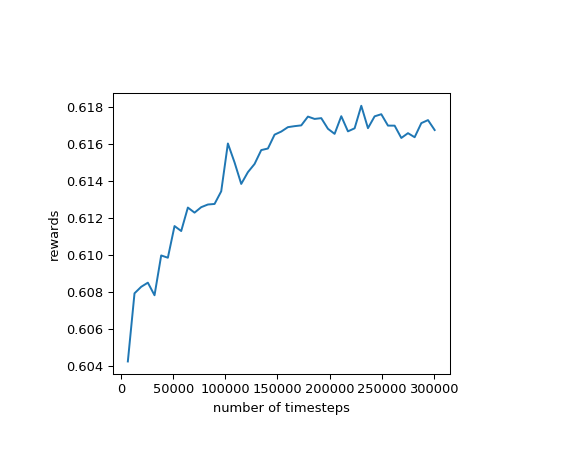

<IPython.core.display.Javascript object>


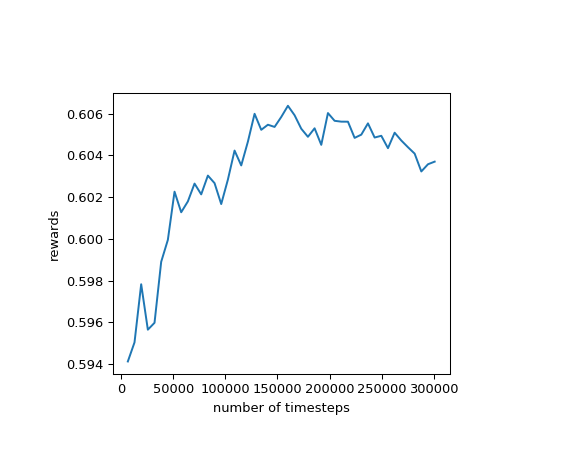

seed 3
Box(-100000.0, 100000.0, (3721,), float64)
seed 3: model definition ..
Using cuda device
seed 3: learning ..


/data/ad181/RemoteDir/Paper_1_codes_revised/utils/custom_eval_callback.py:97: UserWarning: Training and eval env are not of the same type<stable_baselines3.common.vec_env.subproc_vec_env.SubprocVecEnv object at 0x7fb460d8ee48> != <stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7fb460d6cc50>
  warnings.warn("Training and eval env are not of the same type" f"{self.training_env} != {self.eval_env}")
/data/ad181/RemoteDir/Paper_1_codes_revised/utils/custom_eval_callback.py:97: UserWarning: Training and eval env are not of the same type<stable_baselines3.common.vec_env.subproc_vec_env.SubprocVecEnv object at 0x7fb460d8ee48> != <stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7fb460f3ce48>
  warnings.warn("Training and eval env are not of the same type" f"{self.training_env} != {self.eval_env}")


-----------------------------------------
| time/                   |             |
|    fps                  | 223         |
|    iterations           | 1           |
|    time_elapsed         | 5           |
|    total_timesteps      | 1280        |
| train/                  |             |
|    approx_kl            | 0.008656166 |
|    clip_fraction        | 0.448       |
|    clip_range           | 0.1         |
|    entropy_loss         | 2.67        |
|    explained_variance   | 0.965       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.0498     |
|    n_updates            | 4700        |
|    policy_gradient_loss | -0.0364     |
|    std                  | 0.142       |
|    value_loss           | 0.00122     |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 200         |
|    iterations           | 2           |
|    time_elapsed         | 12    

------------------------------------------
| time/                   |              |
|    fps                  | 145          |
|    iterations           | 11           |
|    time_elapsed         | 96           |
|    total_timesteps      | 14080        |
| train/                  |              |
|    approx_kl            | 0.0028278064 |
|    clip_fraction        | 0.293        |
|    clip_range           | 0.1          |
|    entropy_loss         | 2.41         |
|    explained_variance   | 0.959        |
|    learning_rate        | 1e-05        |
|    loss                 | -0.0379      |
|    n_updates            | 200          |
|    policy_gradient_loss | -0.0275      |
|    std                  | 0.149        |
|    value_loss           | 0.00162      |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 148          |
|    iterations           | 12           |
|    time_e

-----------------------------------------
| time/                   |             |
|    fps                  | 144         |
|    iterations           | 21          |
|    time_elapsed         | 185         |
|    total_timesteps      | 26880       |
| train/                  |             |
|    approx_kl            | 0.003028132 |
|    clip_fraction        | 0.284       |
|    clip_range           | 0.1         |
|    entropy_loss         | 2.43        |
|    explained_variance   | 0.966       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.0365     |
|    n_updates            | 400         |
|    policy_gradient_loss | -0.0296     |
|    std                  | 0.149       |
|    value_loss           | 0.00104     |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 146         |
|    iterations           | 22          |
|    time_elapsed         | 192   

-----------------------------------------
| time/                   |             |
|    fps                  | 144         |
|    iterations           | 31          |
|    time_elapsed         | 273         |
|    total_timesteps      | 39680       |
| train/                  |             |
|    approx_kl            | 0.014811409 |
|    clip_fraction        | 0.323       |
|    clip_range           | 0.1         |
|    entropy_loss         | 2.44        |
|    explained_variance   | 0.969       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.0464     |
|    n_updates            | 600         |
|    policy_gradient_loss | -0.0295     |
|    std                  | 0.149       |
|    value_loss           | 0.00103     |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 32          |
|    time_elapsed         | 280   

----------------------------------------
| time/                   |            |
|    fps                  | 145        |
|    iterations           | 41         |
|    time_elapsed         | 361        |
|    total_timesteps      | 52480      |
| train/                  |            |
|    approx_kl            | 0.01391627 |
|    clip_fraction        | 0.345      |
|    clip_range           | 0.1        |
|    entropy_loss         | 2.45       |
|    explained_variance   | 0.969      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0428    |
|    n_updates            | 800        |
|    policy_gradient_loss | -0.0319    |
|    std                  | 0.148      |
|    value_loss           | 0.000941   |
----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 146         |
|    iterations           | 42          |
|    time_elapsed         | 367         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 145          |
|    iterations           | 51           |
|    time_elapsed         | 448          |
|    total_timesteps      | 65280        |
| train/                  |              |
|    approx_kl            | 0.0073577324 |
|    clip_fraction        | 0.348        |
|    clip_range           | 0.1          |
|    entropy_loss         | 2.46         |
|    explained_variance   | 0.961        |
|    learning_rate        | 1e-05        |
|    loss                 | -0.0453      |
|    n_updates            | 1000         |
|    policy_gradient_loss | -0.0338      |
|    std                  | 0.148        |
|    value_loss           | 0.00129      |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 146         |
|    iterations           | 52          |
|    time_elaps

-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 61          |
|    time_elapsed         | 536         |
|    total_timesteps      | 78080       |
| train/                  |             |
|    approx_kl            | 0.012175275 |
|    clip_fraction        | 0.349       |
|    clip_range           | 0.1         |
|    entropy_loss         | 2.47        |
|    explained_variance   | 0.959       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.0451     |
|    n_updates            | 1200        |
|    policy_gradient_loss | -0.0335     |
|    std                  | 0.147       |
|    value_loss           | 0.00125     |
-----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 145        |
|    iterations           | 62         |
|    time_elapsed         | 543       

-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 71          |
|    time_elapsed         | 625         |
|    total_timesteps      | 90880       |
| train/                  |             |
|    approx_kl            | 0.009898023 |
|    clip_fraction        | 0.393       |
|    clip_range           | 0.1         |
|    entropy_loss         | 2.49        |
|    explained_variance   | 0.967       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.0468     |
|    n_updates            | 1400        |
|    policy_gradient_loss | -0.0347     |
|    std                  | 0.147       |
|    value_loss           | 0.00103     |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 72          |
|    time_elapsed         | 631   

-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 81          |
|    time_elapsed         | 712         |
|    total_timesteps      | 103680      |
| train/                  |             |
|    approx_kl            | 0.012179479 |
|    clip_fraction        | 0.398       |
|    clip_range           | 0.1         |
|    entropy_loss         | 2.5         |
|    explained_variance   | 0.961       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.048      |
|    n_updates            | 1600        |
|    policy_gradient_loss | -0.0372     |
|    std                  | 0.147       |
|    value_loss           | 0.00114     |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 82          |
|    time_elapsed         | 718   

-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 91          |
|    time_elapsed         | 800         |
|    total_timesteps      | 116480      |
| train/                  |             |
|    approx_kl            | 0.017602988 |
|    clip_fraction        | 0.407       |
|    clip_range           | 0.1         |
|    entropy_loss         | 2.51        |
|    explained_variance   | 0.969       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.0471     |
|    n_updates            | 1800        |
|    policy_gradient_loss | -0.0374     |
|    std                  | 0.147       |
|    value_loss           | 0.00106     |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 92          |
|    time_elapsed         | 807   

-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 101         |
|    time_elapsed         | 888         |
|    total_timesteps      | 129280      |
| train/                  |             |
|    approx_kl            | 0.016397174 |
|    clip_fraction        | 0.417       |
|    clip_range           | 0.1         |
|    entropy_loss         | 2.52        |
|    explained_variance   | 0.96        |
|    learning_rate        | 1e-05       |
|    loss                 | -0.0499     |
|    n_updates            | 2000        |
|    policy_gradient_loss | -0.0363     |
|    std                  | 0.146       |
|    value_loss           | 0.00113     |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 102         |
|    time_elapsed         | 895   

-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 111         |
|    time_elapsed         | 976         |
|    total_timesteps      | 142080      |
| train/                  |             |
|    approx_kl            | 0.010234154 |
|    clip_fraction        | 0.385       |
|    clip_range           | 0.1         |
|    entropy_loss         | 2.53        |
|    explained_variance   | 0.964       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.0467     |
|    n_updates            | 2200        |
|    policy_gradient_loss | -0.0331     |
|    std                  | 0.146       |
|    value_loss           | 0.00117     |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 112         |
|    time_elapsed         | 983   

-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 121         |
|    time_elapsed         | 1063        |
|    total_timesteps      | 154880      |
| train/                  |             |
|    approx_kl            | 0.009255245 |
|    clip_fraction        | 0.403       |
|    clip_range           | 0.1         |
|    entropy_loss         | 2.54        |
|    explained_variance   | 0.969       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.0459     |
|    n_updates            | 2400        |
|    policy_gradient_loss | -0.0375     |
|    std                  | 0.146       |
|    value_loss           | 0.00105     |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 122         |
|    time_elapsed         | 1070  

-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 131         |
|    time_elapsed         | 1152        |
|    total_timesteps      | 167680      |
| train/                  |             |
|    approx_kl            | 0.014867394 |
|    clip_fraction        | 0.435       |
|    clip_range           | 0.1         |
|    entropy_loss         | 2.55        |
|    explained_variance   | 0.961       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.0517     |
|    n_updates            | 2600        |
|    policy_gradient_loss | -0.0386     |
|    std                  | 0.145       |
|    value_loss           | 0.00125     |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 132         |
|    time_elapsed         | 1158  

-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 141         |
|    time_elapsed         | 1239        |
|    total_timesteps      | 180480      |
| train/                  |             |
|    approx_kl            | 0.018587638 |
|    clip_fraction        | 0.454       |
|    clip_range           | 0.1         |
|    entropy_loss         | 2.56        |
|    explained_variance   | 0.965       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.0477     |
|    n_updates            | 2800        |
|    policy_gradient_loss | -0.035      |
|    std                  | 0.145       |
|    value_loss           | 0.00107     |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 142         |
|    time_elapsed         | 1246  

-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 151         |
|    time_elapsed         | 1327        |
|    total_timesteps      | 193280      |
| train/                  |             |
|    approx_kl            | 0.018579684 |
|    clip_fraction        | 0.461       |
|    clip_range           | 0.1         |
|    entropy_loss         | 2.57        |
|    explained_variance   | 0.958       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.0501     |
|    n_updates            | 3000        |
|    policy_gradient_loss | -0.038      |
|    std                  | 0.145       |
|    value_loss           | 0.0013      |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 152         |
|    time_elapsed         | 1334  

-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 161         |
|    time_elapsed         | 1415        |
|    total_timesteps      | 206080      |
| train/                  |             |
|    approx_kl            | 0.011999105 |
|    clip_fraction        | 0.431       |
|    clip_range           | 0.1         |
|    entropy_loss         | 2.58        |
|    explained_variance   | 0.971       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.0464     |
|    n_updates            | 3200        |
|    policy_gradient_loss | -0.0366     |
|    std                  | 0.144       |
|    value_loss           | 0.00095     |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 162         |
|    time_elapsed         | 1422  

----------------------------------------
| time/                   |            |
|    fps                  | 145        |
|    iterations           | 171        |
|    time_elapsed         | 1503       |
|    total_timesteps      | 218880     |
| train/                  |            |
|    approx_kl            | 0.01485401 |
|    clip_fraction        | 0.463      |
|    clip_range           | 0.1        |
|    entropy_loss         | 2.59       |
|    explained_variance   | 0.966      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.05      |
|    n_updates            | 3400       |
|    policy_gradient_loss | -0.0376    |
|    std                  | 0.144      |
|    value_loss           | 0.0011     |
----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 145          |
|    iterations           | 172          |
|    time_elapsed         | 1509         |
|    t

-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 181         |
|    time_elapsed         | 1591        |
|    total_timesteps      | 231680      |
| train/                  |             |
|    approx_kl            | 0.016688557 |
|    clip_fraction        | 0.405       |
|    clip_range           | 0.1         |
|    entropy_loss         | 2.6         |
|    explained_variance   | 0.967       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.0394     |
|    n_updates            | 3600        |
|    policy_gradient_loss | -0.0342     |
|    std                  | 0.144       |
|    value_loss           | 0.00113     |
-----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 145        |
|    iterations           | 182        |
|    time_elapsed         | 1598      

------------------------------------------
| time/                   |              |
|    fps                  | 145          |
|    iterations           | 191          |
|    time_elapsed         | 1679         |
|    total_timesteps      | 244480       |
| train/                  |              |
|    approx_kl            | 0.0034976224 |
|    clip_fraction        | 0.439        |
|    clip_range           | 0.1          |
|    entropy_loss         | 2.61         |
|    explained_variance   | 0.971        |
|    learning_rate        | 1e-05        |
|    loss                 | -0.0534      |
|    n_updates            | 3800         |
|    policy_gradient_loss | -0.0371      |
|    std                  | 0.143        |
|    value_loss           | 0.000993     |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 192         |
|    time_elaps

-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 201         |
|    time_elapsed         | 1767        |
|    total_timesteps      | 257280      |
| train/                  |             |
|    approx_kl            | 0.013426703 |
|    clip_fraction        | 0.421       |
|    clip_range           | 0.1         |
|    entropy_loss         | 2.62        |
|    explained_variance   | 0.968       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.0447     |
|    n_updates            | 4000        |
|    policy_gradient_loss | -0.0376     |
|    std                  | 0.143       |
|    value_loss           | 0.00103     |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 202         |
|    time_elapsed         | 1774  

-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 211         |
|    time_elapsed         | 1855        |
|    total_timesteps      | 270080      |
| train/                  |             |
|    approx_kl            | 0.023310868 |
|    clip_fraction        | 0.447       |
|    clip_range           | 0.1         |
|    entropy_loss         | 2.63        |
|    explained_variance   | 0.968       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.0495     |
|    n_updates            | 4200        |
|    policy_gradient_loss | -0.0378     |
|    std                  | 0.143       |
|    value_loss           | 0.00104     |
-----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 145        |
|    iterations           | 212        |
|    time_elapsed         | 1862      

-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 221         |
|    time_elapsed         | 1943        |
|    total_timesteps      | 282880      |
| train/                  |             |
|    approx_kl            | 0.018323893 |
|    clip_fraction        | 0.459       |
|    clip_range           | 0.1         |
|    entropy_loss         | 2.64        |
|    explained_variance   | 0.968       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.0488     |
|    n_updates            | 4400        |
|    policy_gradient_loss | -0.0365     |
|    std                  | 0.143       |
|    value_loss           | 0.00116     |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 222         |
|    time_elapsed         | 1950  

-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 231         |
|    time_elapsed         | 2031        |
|    total_timesteps      | 295680      |
| train/                  |             |
|    approx_kl            | 0.017494287 |
|    clip_fraction        | 0.479       |
|    clip_range           | 0.1         |
|    entropy_loss         | 2.65        |
|    explained_variance   | 0.974       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.0501     |
|    n_updates            | 4600        |
|    policy_gradient_loss | -0.0389     |
|    std                  | 0.142       |
|    value_loss           | 0.00105     |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 232         |
|    time_elapsed         | 2037  

<IPython.core.display.Javascript object>


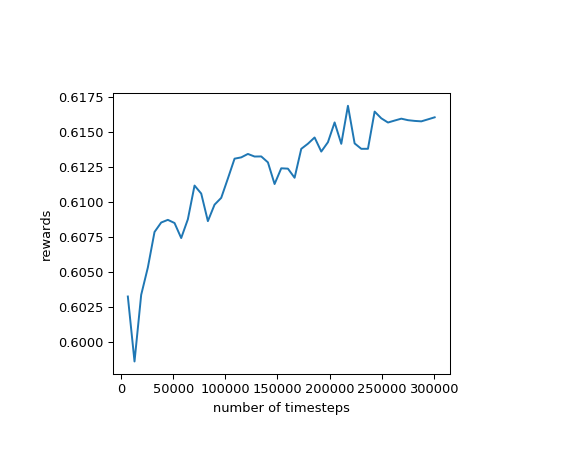

<IPython.core.display.Javascript object>


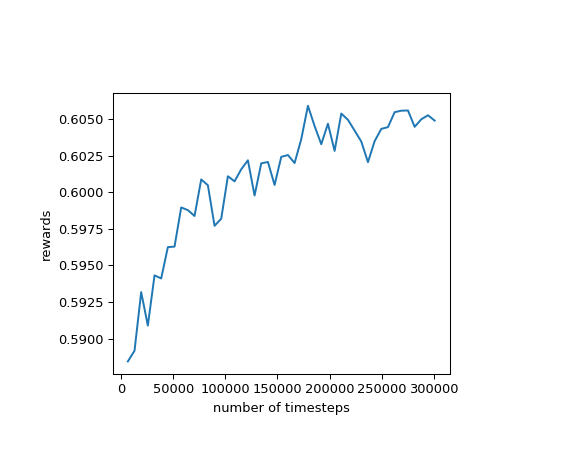

In [9]:
for seed in range(1,4):
    if True:
        print(f'seed {seed}')
        log_dir = './data/'+case+'/seed_'+str(seed)
        os.makedirs(log_dir, exist_ok=True)
        num_cpu = 64
        env_train.seed(seed)
        env_eval.seed(seed)
        env_train_ = env_wrappers(env_train, x_coords, y_coords)
        env_eval_ = env_wrappers(env_eval, x_coords, y_coords)
        train_callback = CustomEvalCallback(env_train_, 
                                            best_model_save_path=None, 
                                            n_eval_episodes=1,
                                            log_path=str(log_dir)+'/results_train', 
                                            eval_freq=100)
        callback_list = [train_callback]
        eval_callback = CustomEvalCallback(env_eval_, 
                                           best_model_save_path=None, 
                                           n_eval_episodes=1,
                                           log_path=str(log_dir)+'/results_eval', 
                                           eval_freq=100)
        callback_list.append(eval_callback)
        callback = CallbackList(callback_list)
        env = SubprocVecEnv([make_env(env_train_, i, seed) for i in range(num_cpu)])
        print(env.observation_space)
        print(f'seed {seed}: model definition ..')
        model = PPO(policy=MlpPolicy,
                env=env,
                learning_rate = 1e-5,
                n_steps = 20,
                batch_size = 320,
                n_epochs = 20,
                gamma = 0.99,
                gae_lambda = 0.95,
                clip_range = 0.1,
                clip_range_vf = None,
                ent_coef = 0.001,
                vf_coef = 0.5,
                max_grad_norm = 0.9,
                use_sde= False,
                create_eval_env= False,
                policy_kwargs = dict(net_arch=[4000,2000,800,300], log_std_init=-1.9),
                verbose = 1,
                target_kl =0.05,
                seed = seed,
                device = "auto")
        print(f'seed {seed}: learning ..')
        model.learn(total_timesteps=300000, callback=callback)
#         model.save(log_dir+'/PPO')
        fig = plot_learning(log_dir, case='train')
        fig.savefig(log_dir+'/learn_train.png')
        fig = plot_learning(log_dir, case='eval')
        fig.savefig(log_dir+'/learn_eval.png')